In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LineDetection.jpg to LineDetection.jpg


# Q2
Read `LineDetection.jpg` (the image below)




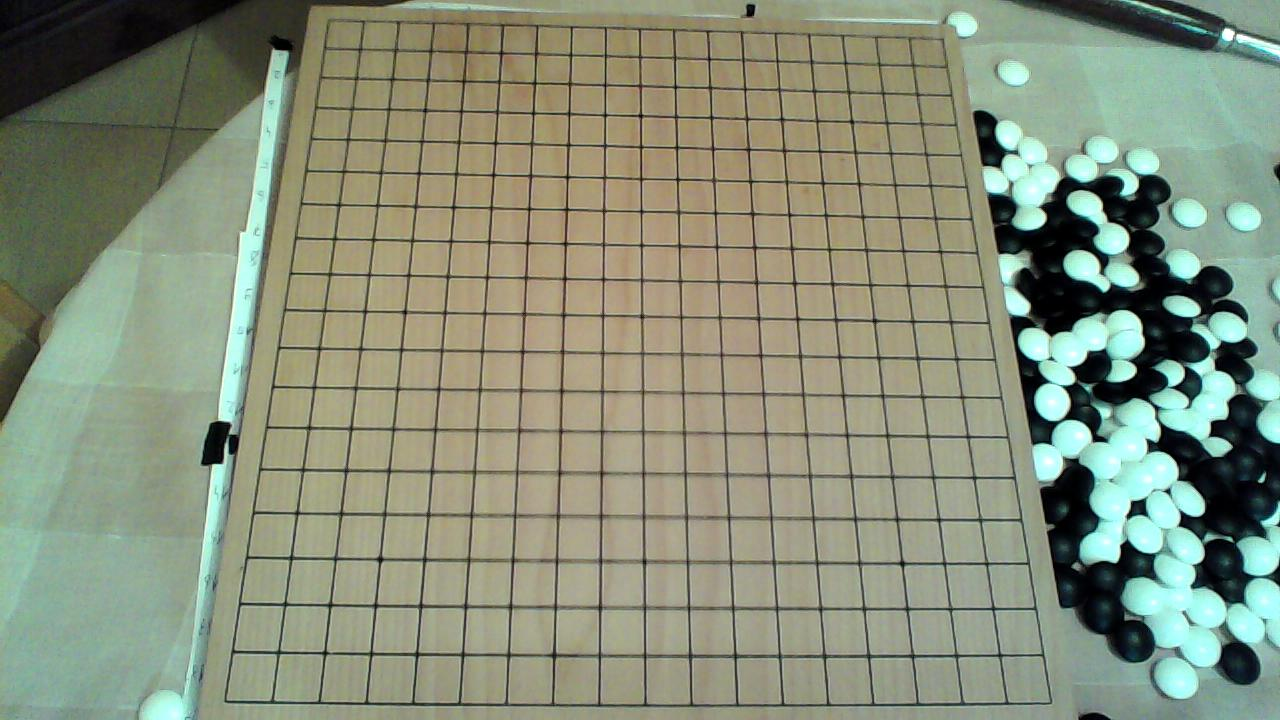

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


True

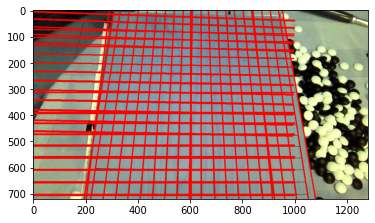

In [7]:
#TODO
img = cv2.imread("LineDetection.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny=cv2.Canny(gray,50,200)
lines = cv2.HoughLines(canny,1,np.pi/180,250)
for line in lines:
    x,theta = line[0]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * x
    y0 = b * x
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(img, pt1, pt2, (255,0,0), 3)

plt.imshow(img)   
cv2.imwrite("HoughLines.jpg",img)

Here is a sample output:

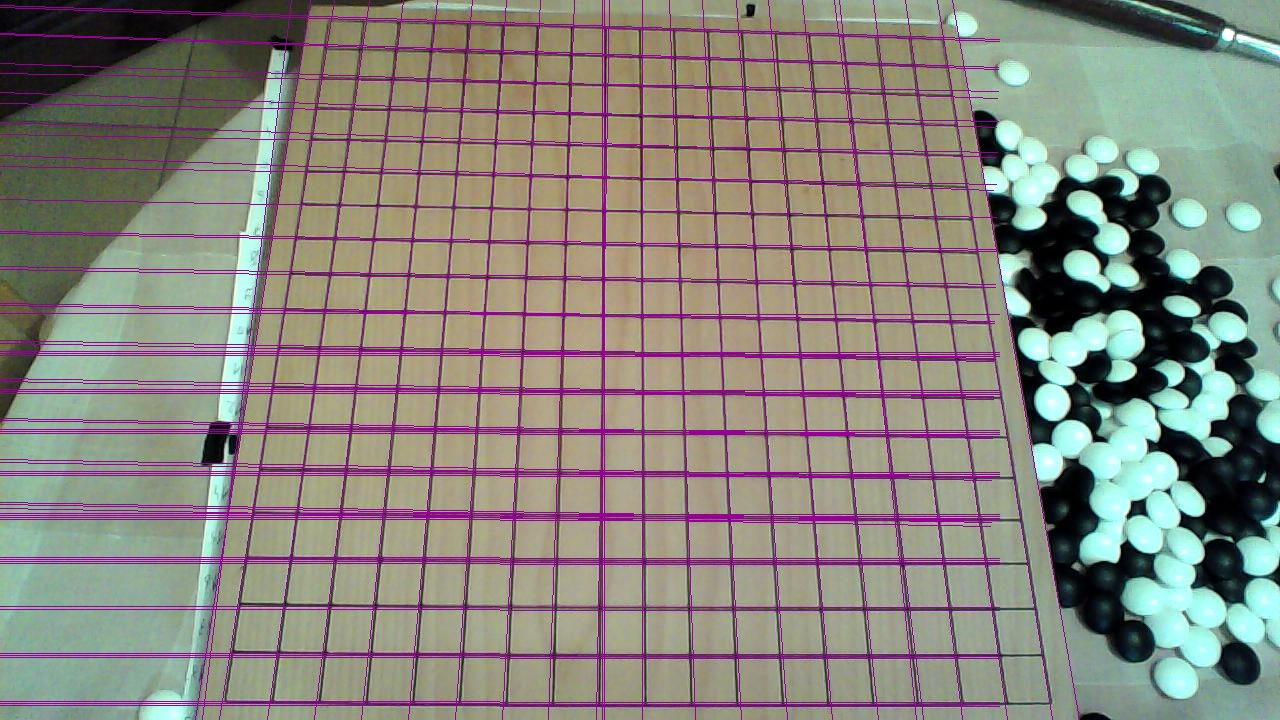

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

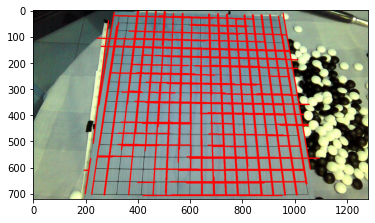

In [14]:
#TODO
img = cv2.imread("LineDetection.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny=cv2.Canny(gray,50,200)
lines= cv2.HoughLinesP(canny,1,np.pi/360,250,minLineLength=10, maxLineGap=20)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
cv2.imwrite("HoughLinesP.jpg",img)
plt.imshow(img) 

Here is a sample output (Not the best one): 

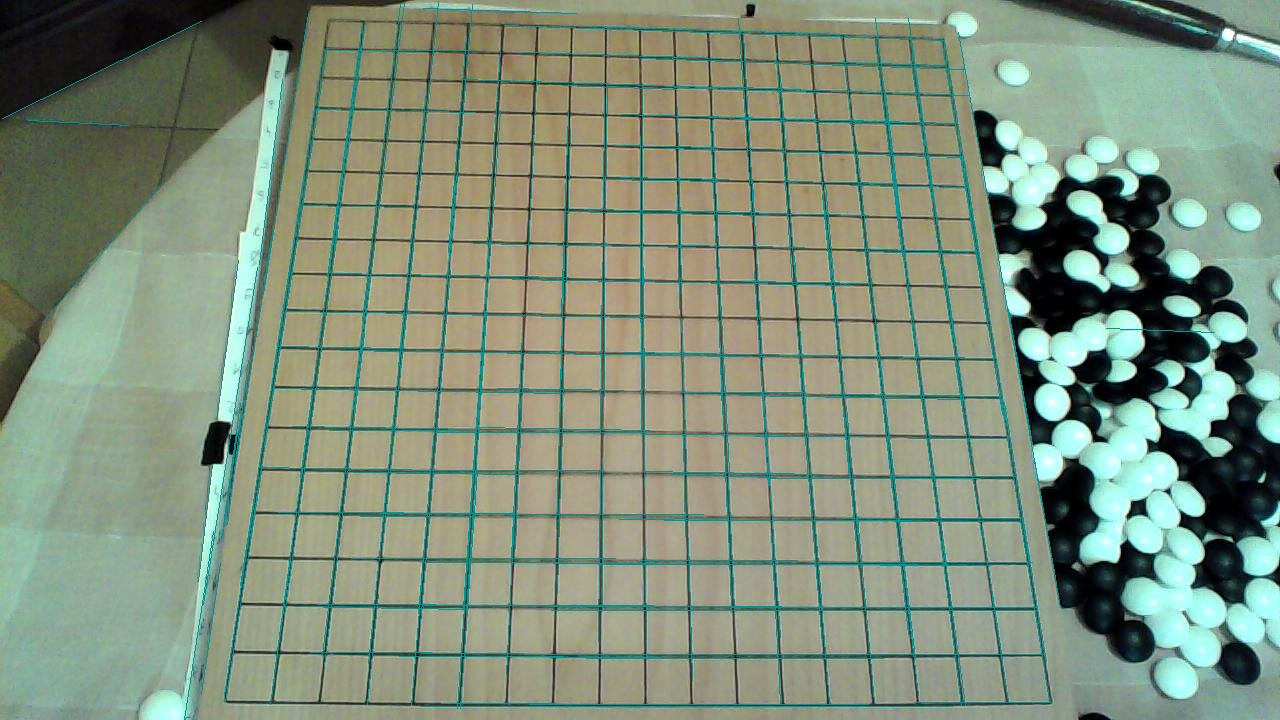

Note that you should find the optimum amount of parameters which are used in this algorithm.

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

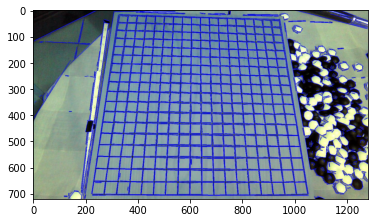

In [18]:
img = cv2.imread("LineDetection.jpg",0)
imgcolorous = cv2.imread('LineDetection.jpg')
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
cv2.imwrite('LineDetection.jpg',drawn_img)
plt.imshow(drawn_img) 

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [ ]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #TODO
  r = r/255
  g = g/255
  b = b/255
  k = round(1-max(r, g, b),2)
  c = round((1-r-k)/(1-k) ,2)
  m = round((1-g-k)/(1-k) ,2)
  y = round((1-b-k)/(1-k) ,2)

  k = int(k*CMYK_SCALE)
  c = int(c*CMYK_SCALE)
  m = int(m*CMYK_SCALE)
  y = int(y*CMYK_SCALE)
  return c, m, y, k

In [ ]:
rgb_to_cmyk(25, 56, 25)

(55, 0, 55, 78)

Expected Output: (55, 0, 55, 78)

In [ ]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  #TODO
  r = int(255* (1-c/100)* (1-k/100))
  g = int(255* (1-m/100)* (1-k/100))
  b = int(255* (1-y/100)* (1-k/100))
  return r, g, b

In [ ]:
cmyk_to_rgb(55, 0, 55, 78)

(25, 56, 25)

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [ ]:
#TODO 
def RGBtoHSI(R,G,B):
  theta = (np.arccos(((R-G) + (R-B))/(2 * math.sqrt(pow(R-G, 2)+((R-B)*(G-B))))) * 180) / np.pi
  if B <= G:
    H = theta
  else:
    H = 360 - theta
  S = 1 - (3 * ((np.min([R, G, B]))/(R+G+B))) 
  I = ((R+G+B) / 3) / 255
  V = np.max([R, G, B]) / 255
  L = ((np.max([R, G, B]) + np.min([R, G, B]))/(2)) / 255
  Y = (0.299 * R) + (0.587 * G) + (0.114 * B)
  return H,S,I,V,L,Y

test = RGBtoHSI(150,65,200)
print ("H: ", test[0])
print ("S: ", test[1])
print ("I: ", test[2])
print ("V: ", test[3])
print ("L: ", test[4])
print ("Y: ", test[5])  

H:  278.5130242830111
S:  0.5301204819277108
I:  0.542483660130719
V:  0.7843137254901961
L:  0.5196078431372549
Y:  105.80499999999999


# Good Luck!